In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
plt.style.use('fivethirtyeight')
plt.show()

In [3]:
df = pd.read_csv("amazon_stock.csv")

### Inspect top 10 rows

In [4]:
df.head(10)

,None,ticker,Date,Open,High,Low,Close,Volume,Adj_Close
0,0,AMZN,3/27/2018,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
1,1,AMZN,3/26/2018,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2,2,AMZN,3/23/2018,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
3,3,AMZN,3/22/2018,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
4,4,AMZN,3/21/2018,1586.45,1590.00,1563.17,1581.86,4667291,1581.86
5,5,AMZN,3/20/2018,1550.34,1587.00,1545.41,1586.51,4507049,1586.51
6,6,AMZN,3/19/2018,1554.53,1561.66,1525.35,1544.93,6376619,1544.93
7,7,AMZN,3/16/2018,1583.45,1589.44,1567.50,1571.68,5145054,1571.68
8,8,AMZN,3/15/2018,1595.00,1596.91,1578.11,1582.32,4026744,1582.32
9,9,AMZN,3/14/2018,1597.00,1606.44,1590.89,1591.00,4164395,1591.00


### Remove unwanted columns

Remove first two columns (None and ticker) as they don’t add any value to the dataset. Then, print head() to check if removed

In [5]:
df=df.drop(['None','ticker'],axis=1)
df.head()

,Date,Open,High,Low,Close,Volume,Adj_Close
0,3/27/2018,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
1,3/26/2018,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2,3/23/2018,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
3,3/22/2018,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
4,3/21/2018,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1316 non-null   object 
 1   Open       1316 non-null   float64
 2   High       1316 non-null   float64
 3   Low        1316 non-null   float64
 4   Close      1316 non-null   float64
 5   Volume     1316 non-null   int64  
 6   Adj_Close  1316 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.1+ KB


### Convert "Date" string column into actual Date object

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1316 non-null   datetime64[ns]
 1   Open       1316 non-null   float64       
 2   High       1316 non-null   float64       
 3   Low        1316 non-null   float64       
 4   Close      1316 non-null   float64       
 5   Volume     1316 non-null   int64         
 6   Adj_Close  1316 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.1 KB


### Let us check our data once again, with head()

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj_Close
0,2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
1,2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2,2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
3,2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
4,2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


### Set Date object to be index

Here Date is one of the columns. But we want date to be the index. So, set Date as index for the data frame. Make inplace=True

In [9]:
df.set_index('Date',inplace=True)

df.head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


### Understand Stock Data¶

<AxesSubplot:title={'center':'Adjusted Closing Price'}, xlabel='Date'>

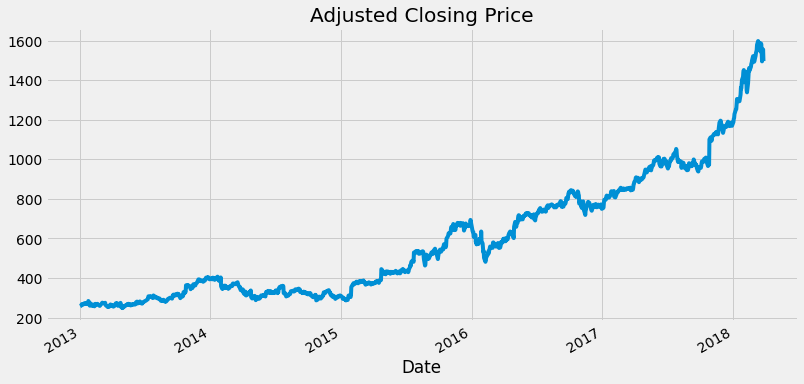

In [10]:
df['Adj_Close'].plot(figsize=(12,6),title='Adjusted Closing Price')

### Understand DateTimeIndex

##### Introduction to datetime module

Python’s basic tools for working with dates and times reside in the built-in datetime module. In pandas, a single point in time is represented as a pandas.Timestamp and we can use the datetime() function to create datetime objects from strings in a wide variety of date/time formats. datetimes are interchangeable with pandas.Timestamp

In [11]:
from datetime import datetime

my_year = 2020
my_month = 5
my_day = 1
my_hour = 13
my_minute = 36
my_second = 45

test_date = datetime(my_year,my_month,my_day)
test_date

datetime.datetime(2020, 5, 1, 0, 0)

In [12]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)

In [13]:
print("The day is :   ",test_date.day) 
print("The hour is :  ",test_date.hour) 
print("The month is : ",test_date.month)

The day is :    1
The hour is :   13
The month is :  5


### Find minimum and maximum dates from data frame, call info() method

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1316 entries, 2018-03-27 to 2013-01-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1316 non-null   float64
 1   High       1316 non-null   float64
 2   Low        1316 non-null   float64
 3   Close      1316 non-null   float64
 4   Volume     1316 non-null   int64  
 5   Adj_Close  1316 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 72.0 KB


### Print minimum and maximum index value of dataframe

In [15]:
print(df.index.min())
print(df.index.max())

2013-01-02 00:00:00
2018-03-27 00:00:00


### Retrieve index of earliest and latest dates using argmin and argmax

In [16]:
df.index.argmin()

1315

In [17]:
df.index.argmax()

0

## 1.Resampling Operation

### Resample data with year end frequency ("Y") with average stock price

In [18]:
df.resample('Y').mean()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2013-12-31,297.877223,300.925966,294.656658,298.032235,2.967880e+06,298.032235
2014-12-31,332.798433,336.317462,328.545440,332.550976,4.083223e+06,332.550976
2015-12-31,478.126230,483.248272,472.875443,478.137321,3.797801e+06,478.137321
2016-12-31,699.669762,705.799103,692.646189,699.523135,4.122043e+06,699.523135
2017-12-31,967.565060,973.789752,959.991826,967.403996,3.466207e+06,967.403996
2018-12-31,1429.770000,1446.701017,1409.469661,1429.991186,5.586829e+06,1429.991186


### Plot a bar chart to show the yearly (Use "A") mean adjusted close price

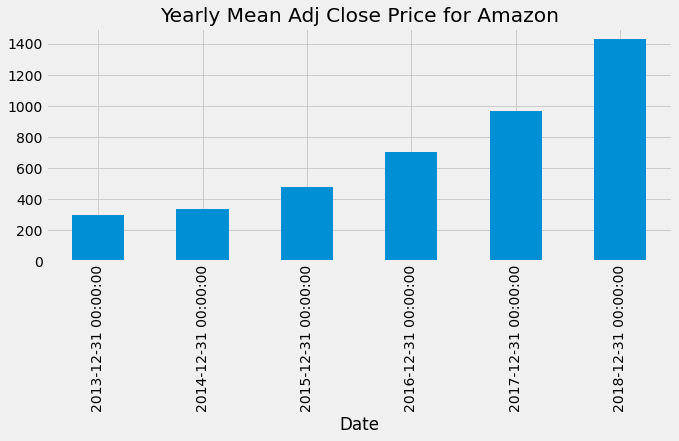

In [19]:
df['Adj_Close'].resample('A').mean().plot(kind='bar',figsize=(10,4))
plt.title('Yearly Mean Adj Close Price for Amazon')
plt.show()

### Plot bar chart to show monthly maximum (Use "MS") opening price for all years

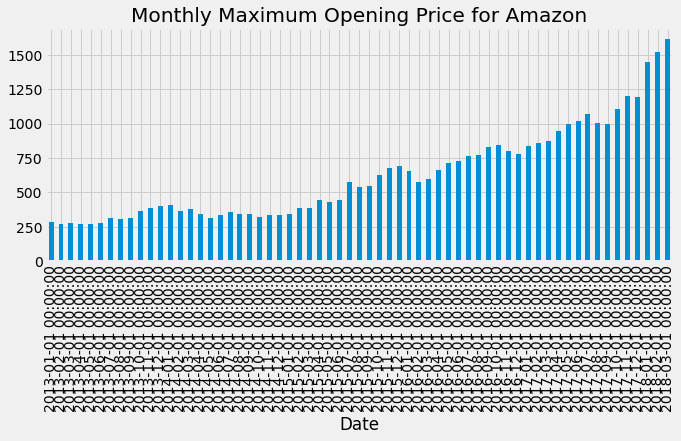

In [31]:
df['Open'].resample('MS').max().plot(kind='bar',figsize=(10,4))
plt.title('Monthly Maximum Opening Price for Amazon')
plt.show()

### Plot bar chart of Quarterly (Use "Q") Average Volume for all years

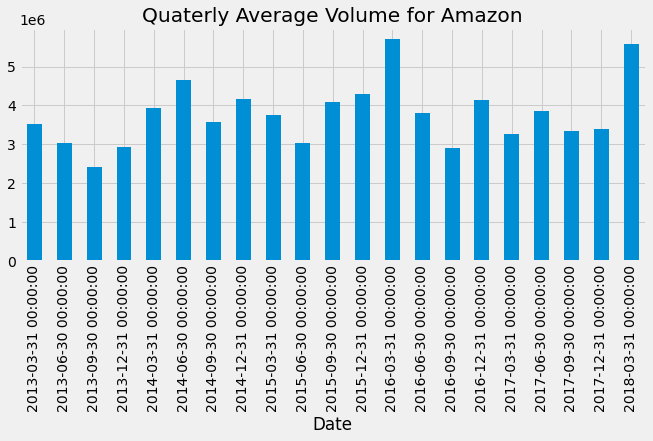

In [21]:
df['Volume'].resample('Q').mean().plot(kind='bar', figsize=(10, 4))
plt.title('Quaterly Average Volume for Amazon')
plt.show()

## 2.Time Shifting Operations

#### Shifting data forward and backward
#### Show head of data

In [22]:
df.head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


### Shift data by 1 Day forward¶

In [23]:
df.shift(1).head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26,1572.40,1575.96,1482.32,1497.05,6793279.0,1497.05
2018-03-23,1530.00,1556.99,1499.25,1555.86,5547618.0,1555.86
2018-03-22,1539.01,1549.02,1495.36,1495.56,7843966.0,1495.56
2018-03-21,1565.47,1573.85,1542.40,1544.10,6177737.0,1544.10


### Shift data by 1 Day backward¶

In [24]:
df.shift(-1).head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1530.00,1556.99,1499.25,1555.86,5547618.0,1555.86
2018-03-26,1539.01,1549.02,1495.36,1495.56,7843966.0,1495.56
2018-03-23,1565.47,1573.85,1542.40,1544.10,6177737.0,1544.10
2018-03-22,1586.45,1590.00,1563.17,1581.86,4667291.0,1581.86
2018-03-21,1550.34,1587.00,1545.41,1586.51,4507049.0,1586.51


### Shifting Time Index

In [25]:
df.head(10)

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86
2018-03-20,1550.34,1587.00,1545.41,1586.51,4507049,1586.51
2018-03-19,1554.53,1561.66,1525.35,1544.93,6376619,1544.93
2018-03-16,1583.45,1589.44,1567.50,1571.68,5145054,1571.68
2018-03-15,1595.00,1596.91,1578.11,1582.32,4026744,1582.32


### Shift Time Index by 3 Months


In [26]:
df.tshift(periods=3,freq='M').head()

<ipython-input-26-95bf196d5da5>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(periods=3,freq='M').head()


,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-05-31,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
2018-05-31,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2018-05-31,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
2018-05-31,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
2018-05-31,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


### Application: Computing Return on investment

<ipython-input-27-e90d55975215>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (df['Adj_Close'].tshift(periods=-365, freq = 'D') / df['Adj_Close'] - 1)


Text(0, 0.5, '% Return on Investment')

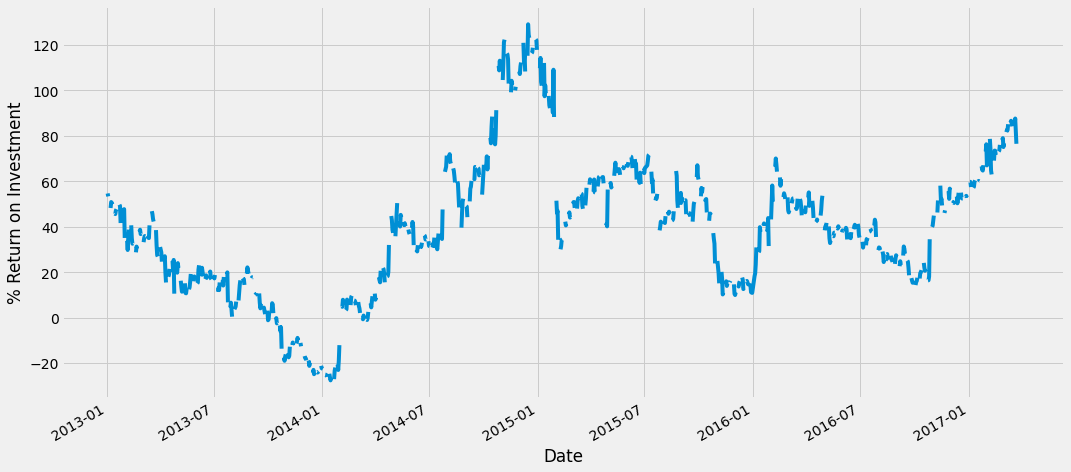

In [27]:
ROI = 100 * (df['Adj_Close'].tshift(periods=-365, freq = 'D') / df['Adj_Close'] - 1)
ROI.plot(figsize=(16,8))
plt.ylabel('% Return on Investment')

## 3.Rolling Window or Moving Window Operations

<AxesSubplot:xlabel='Date'>

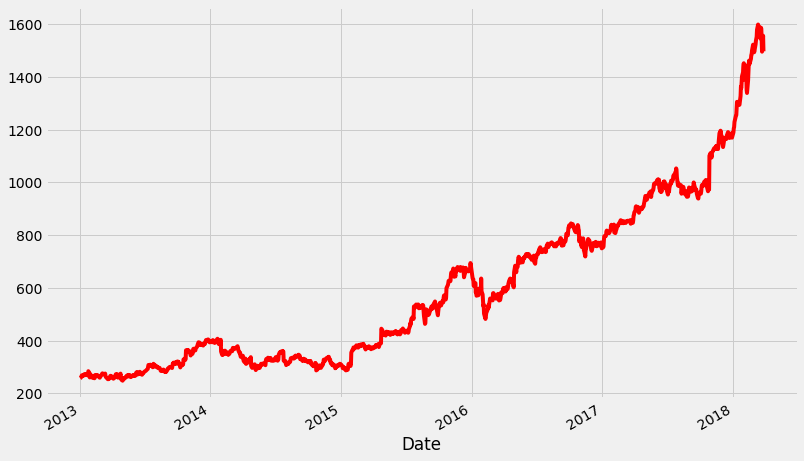

In [28]:
df['Adj_Close'].plot(figsize = (12,8), color='red')

### Find rolling mean for 7 days and show top-10 rows

In [29]:
df.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-23,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-21,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-20,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-19,1556.885714,1570.640000,1521.894286,1543.695714,5.987651e+06,1543.695714
2018-03-16,1558.464286,1572.565714,1534.062857,1554.357143,5.752191e+06,1554.357143
2018-03-15,1567.750000,1578.268571,1545.328571,1558.137143,5.534923e+06,1558.137143


### Plot a line char for "Open" column.
#### Followed by, average rolling window of 30 days on the same "Open" column

<AxesSubplot:xlabel='Date'>

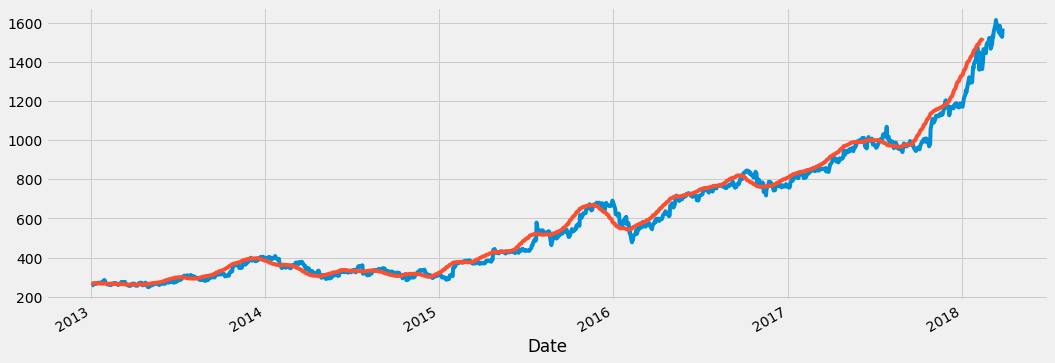

In [30]:
df['Open'].plot()
df.rolling(window=30).mean()['Open'].plot(figsize=(16, 6))